[공통]
- 0과 1로 구분된 데이터는 매장을 둘로 나눈 것으로, 0은 A매장과 B매장, 1은 C매장과 D매장으로부터 추출한 데이터 입니다.


# Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/retail/data/'
pd.set_option('display.max_row', 100)

In [ ]:
# 제품목록 gds_list_0, gds_list_1
gds_0 = pd.read_csv(base_path + 'gds_list_0.csv')
gds_1 = pd.read_csv(base_path + 'gds_list_1.csv')

# 제품 카테고리 목록: gdsclss_list_0, gdsclss_list_1
gdsclss_0 = pd.read_csv(base_path + 'gdsclss_list_0.csv')
gdsclss_1 = pd.read_csv(base_path + 'gdsclss_list_1.csv')

# 매장 목록: str_list
str_list = pd.read_csv(base_path + 'str_list.csv')

# 매출 데이터 마스터(장바구니 단위): tr_list_0, tr_list_1
tr_list_0 = pd.read_csv(base_path + 'tr_list_0_convert.csv')
tr_list_1 = pd.read_csv(base_path + 'tr_list_1_convert.csv')

# 매출 제품 데이터 상세: tr_dtl_list_0, tr_dtl_list_1
tr_dtl_list_0 = pd.read_csv(base_path + 'tr_dtl_list_0.csv')
tr_dtl_list_1 = pd.read_csv(base_path + 'tr_dtl_list_1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 데이터셋 확인

## 제품 목록: gds_list_0, gds_list_1
* CO_CD: 회사 코드
* STR_CD: 매장 코드
* PLU_CD: 제품 코드로 880으로 시작하는 바코드도 있지만 매장에서 직접 생성하여 등록한 코드가 혼재
* GDS_NM: 제품 명
* GDS_CLSS_CD: 제품 카테고리 코드(자세한 코드 구조는 제품 카테고리 데이터 참조)
* GDS_TP_NM: 제품 구분으로 [일반/저울상품/사이드상품/원타임/공병/배송료]로 구분
* VEN_CD: 제품 공급사 코드로 매장에서 관리하는 번호기 때문에 다른 매장 간 같은 코드로 중복되더라도 다른 제품 공급사일 수 있음

In [ ]:
gds_0

,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
0,1001294,12018,1,배송비,999999,배송료,0
1,1001294,12018,2,사은행사쿠폰,999999,배송료,0
2,1001294,12018,91770,코지유리물병,93331,일반,0
3,1001294,12018,91770,크지물병,91701,일반,0
4,1001294,12018,50390427,POM석류,12579,일반,0
...,...,...,...,...,...,...,...
102668,1001739,72005,9901234001249,그린매실주통,20301,일반,30
102669,1001739,72005,9901345698772,담배케이스스틸,20301,일반,30
102670,1001739,72005,9902345678771,9902345678771등록,70202,일반,30
102671,1001739,72005,990891,ok캐쉬백 포인트,70101,일반,37


In [ ]:
gds_0[gds_0.GDS_NM.str.contains(r'(케이스)')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
2707,1001294,12018,223143,복숭아(케이스)2팩,40205,저울상품,81
3595,1001294,12018,290300000719,케이스,95501,일반,0
3623,1001294,12018,290300000869,리더벨트케이스,95501,일반,0
5681,1001294,12018,3304567123071,점보롤 케이스,99999,일반,13
7330,1001294,12018,4955959123019,두부케이스,91301,일반,0
...,...,...,...,...,...,...,...
98756,1001739,72005,8809089309842,뽀로로/이지수저케이스세트,20302,일반,30
98757,1001739,72005,8809089309859,패티/이지수저케이스세트,20302,일반,30
99571,1001739,72005,8809183002359,문서보존케이스A4,20301,일반,30
101306,1001739,72005,8809358470204,후토스 수저케이스셋트*에스유,20301,일반,37


In [ ]:
gds_0[gds_0.GDS_NM.str.contains(r'(포인트)')] # 포인트

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
19378,1001294,12018,8801046895450,포인트녹차머드폼,21001,일반,0
19379,1001294,12018,8801046895467,뉴포인트녹차폼,21001,일반,0
39495,1001294,12018,8801237639450,루미포인트자,90301,일반,0
41633,1001294,12018,8801237726877,컬러포인트수첩,90301,일반,0
45180,1001294,12018,8802088301640,포인트훅행거(사각),91701,일반,0
45181,1001294,12018,8802088301664,포인트원형행가,99999,일반,13
45182,1001294,12018,8802088301671,우일.포인트하트행가(P-04),91701,일반,0
45367,1001294,12018,8802240002514,데코포인트시트,91701,일반,0
45389,1001294,12018,8802240014210,포인트스티커(소),91701,일반,0
51662,1001294,12018,8806329301246,포인트욕실화,91401,일반,0


In [ ]:
gds_0[gds_0.GDS_NM.str.contains(r'(등록)')] # outlier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
8,1001294,12018,35000000,000035000000등록,20901,일반,0
3414,1001294,12018,2902000034154,2902000034154등록,91701,일반,0
3427,1001294,12018,2902000039319,2902000039319등록,95501,일반,0
3735,1001294,12018,2903000010834,2903000010834등록,91701,일반,0
3767,1001294,12018,2903000025746,2903000025746등록,91701,일반,0
3823,1001294,12018,2903000026699,2903000026699등록,999999,일반,0
60399,1001294,12018,8809172924488,8809172924488등록,91701,일반,0
72355,1001739,72005,1047605592,01047605592등록,70202,일반,37
72519,1001739,72005,7120013,07120013등록,70202,일반,37
72621,1001739,72005,8480644,08480644등록,70202,일반,37


In [ ]:
gds_0['GDS_NM'].nunique()

86014

In [ ]:
gds_0[gds_0['GDS_NM']=='악세사리']

,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
2370,1001294,12018,22000736,악세사리,95501,일반,0
2376,1001294,12018,22000835,악세사리,95501,일반,0
2377,1001294,12018,22000873,악세사리,95501,일반,0
2378,1001294,12018,22000880,악세사리,95501,일반,0
2379,1001294,12018,22000897,악세사리,95501,일반,0
...,...,...,...,...,...,...,...
3953,1001294,12018,290409140635,악세사리,95501,일반,0
14723,1001294,12018,8801038123905,악세사리,95501,일반,0
56251,1001294,12018,8809043460107,악세사리,95501,일반,0
61697,1001294,12018,8809207588753,악세사리,95501,일반,0


In [ ]:
len(gds_0['GDS_NM'].value_counts().index)

86014

## 제품 카테고리 목록: gdsclss_list_0, gdsclss_list_1

* CO_CD: 회사 코드
* STR_CD: B/C/D마트는 000000으로 표기되고 A마트만 A마트의 매장코드가 표시됨(A마트는 다점포회사 소속으로 매장마다 카테고리 구분하여 관리)
* GDS_CLSS_CD: 제품 카테고리 코드로 2자리, 4자리, 6자리로 구성, 6자리 코드의 앞 4자리와 4자리 코드의 앞 2자리는 각 상위 카테고리의 코드
* GDS_CLSS_NM: 제품 카테고리 명
* GDS_CLSS_LVL_TP: 카테고리 Level로 1/2/3으로 표시 ???
* UP_GDS_CLSS_CD: 상위 카테고리 코드
* GDS_CLSS_GRP_TP: 카테고리 구분으로 1은 공산품, 2는 식자재, 3은 신선식품(실수로 연결을 못해서 코드 그대로 표시)

In [ ]:
gdsclss_0['STR_CD'].value_counts()

12018    607
0        165
Name: STR_CD, dtype: int64

In [ ]:
gdsclss_1

3    552
2    183
1     37
Name: GDS_CLSS_LVL_TP, dtype: int64

## 매장 목록: str_list
* CO_CD: 회사 코드
* STR_CD: 매장 코드
* STR_NM: (마스킹 된) 매장 명
* CM_ITM_NM: 매장 크기 구분, 30평/50평/100평/300평/500평/1000평 총 6종류
* POS_QTY: 포스 대수(토마토 솔루션 가입 당시)
* OPN_DT: 매장 오픈 일자

In [ ]:
str_list

,CO_CD,STR_CD,STR_NM,CM_ITM_NM,POS_QTY,OPN_DT
0,1001294,12018,A마트,100평대,9,20201220
1,1001739,72005,B마트,100평대,3,20210526
2,1001993,142011,C마트,30평대,1,20210805
3,1002056,168009,D마트,100평대,2,20210831


## 매출 데이터 마스터(장바구니 단위): tr_list_0, tr_list_1
* SAL_DT: 매출 등록 일자
* STR_CD: 매장 코드
* POS_NO: 포스 번호
* TRAN_NO: 포스 거래 순번 -- **위의 4개 항목을 합쳐 하나의 장바구니**
* SALE_KIND_TP_NM: 매출 구분으로 매출/전체취소/배달입금/배달착불만 대상으로 처리하면 됩니다. 나머지는 기능적이거나 오프라인 외 매출 등 입니다.
* SALE_RTN_SGN: 금액에 대한 부호로 1과 -1로 구분, -1은 반품
* REAL_SAL_DT: 실제 판매 일자
* *REAL_SAL_TTM: 실제 판매 시각*
* PAY_AMT: 지불 금액
* **MSHP_ID: (마스킹 된) 회원 번호**
* ORN_SAL_DT: 원 매출 등록 일자(반품 시 반품 대상이 되는 매출을 특정하기 위함)
* ORN_POS_NO: 원 매출 포스 번호(반품 시 반품 대상이 되는 매출을 특정하기 위함)
* ORN_TRAN_NO: 원 매출 포스 거래 순번(반품 시 반품 대상이 되는 매출을 특정하기 위함)

In [ ]:
tr_list_0

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
0,20210901,12018,01,1,영업개시,1,20210901,65745,0.0,NaN,NaN,NaN,NaN
1,20210901,12018,01,2,준비금,1,20210901,65758,0.0,NaN,NaN,NaN,NaN
2,20210901,12018,01,3,매출,1,20210901,71138,9000000.0,NaN,NaN,NaN,NaN
3,20210901,12018,01,4,전체취소,1,20210901,85353,0.0,NaN,NaN,NaN,NaN
4,20210901,12018,01,5,매출,1,20210901,91245,3650.0,012018_0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395629,20220901,72005,03,334,캐셔정산,1,20220901,215155,0.0,NaN,NaN,NaN,NaN
1395630,20220901,72005,03,335,POS정산,1,20220901,215201,0.0,NaN,NaN,NaN,NaN
1395631,20220901,72005,03,336,영업종료,1,20220901,215202,0.0,NaN,NaN,NaN,NaN
1395632,20220901,72005,03,337,로그오프,1,20220901,215210,0.0,NaN,NaN,NaN,NaN


In [ ]:
tr_list_0[tr_list_0.duplicated(subset='MSHP_ID') & tr_list_0['MSHP_ID'].notna()]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
32,20210901,12018,01,33,매출,1,20210901,95632,4380.0,012018_1,NaN,NaN,NaN
39,20210901,12018,01,40,거래후적립,1,20210901,100155,0.0,012018_26,20210901.0,1.0,39.0
90,20210901,12018,01,91,거래후적립,1,20210901,103147,0.0,012018_67,20210901.0,1.0,89.0
116,20210901,12018,01,117,매출,1,20210901,104715,1980.0,012018_75,NaN,NaN,NaN
121,20210901,12018,01,122,매출,1,20210901,104955,1980.0,012018_80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395619,20220901,72005,03,324,매출,1,20220901,213618,2980.0,072005_544,NaN,NaN,NaN
1395622,20220901,72005,03,327,매출,1,20220901,214425,134830.0,072005_2653,NaN,NaN,NaN
1395623,20220901,72005,03,328,매출,1,20220901,214500,7980.0,072005_5652,NaN,NaN,NaN
1395624,20220901,72005,03,329,매출,1,20220901,214612,5100.0,072005_435,NaN,NaN,NaN


In [ ]:
tr_list_0['MSHP_ID'].notna().mean()

0.7327838100820129

* 회원번호가 73%로 존재

In [ ]:
tr_list_0['REAL_SAL_TTM'].value_counts()

170249    71
181318    69
170542    69
172502    67
180315    66
          ..
70305      1
63715      1
63606      1
63555      1
222900     1
Name: REAL_SAL_TTM, Length: 59389, dtype: int64

In [ ]:
tr_list_0['MSHP_ID'].value_counts()

012018_398      793
012018_135      718
012018_945      715
012018_2207     682
012018_52       669
               ... 
012018_18188      1
012018_18193      1
012018_18194      1
012018_18200      1
072005_6103       1
Name: MSHP_ID, Length: 29253, dtype: int64

In [ ]:
tr_list_0[tr_list_0['MSHP_ID'] == '012018_398']

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
526,20210901,12018,01,527,매출,1,20210901,161704,64130.0,012018_398,NaN,NaN,NaN
1505,20210901,12018,03,64,매출,1,20210901,93351,5590.0,012018_398,NaN,NaN,NaN
3793,20210902,12018,01,452,매출,1,20210902,151824,7410.0,012018_398,NaN,NaN,NaN
4736,20210902,12018,03,55,매출,1,20210902,142808,49600.0,012018_398,NaN,NaN,NaN
5177,20210902,12018,04,278,매출,1,20210902,143711,45000.0,012018_398,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093328,20220901,12018,02,220,매출,1,20220901,172402,13720.0,012018_398,NaN,NaN,NaN
1093966,20220901,12018,03,397,매출,1,20220901,183814,3100.0,012018_398,NaN,NaN,NaN
1094826,20220901,12018,07,18,매출,1,20220901,92853,2000.0,012018_398,NaN,NaN,NaN
1094846,20220901,12018,07,38,매출,1,20220901,100324,102430.0,012018_398,NaN,NaN,NaN


## 매출 제품 데이터 상세: tr_dtl_list_0, tr_dtl_list_1
* SAL_DT: 매출 등록 일자
* STR_CD: 매장 코드
* POS_NO: 포스 번호
* TRAN_NO: 포스 거래 순번 -- 위의 4개 항목을 합쳐 하나의 장바구니
* SEQ_NO: 매출 별 상품 순번
* DESI_CNCL_TP_NM: 취소 구분으로 정상판매/지정취소/전체취소 총 3종류이며 지정취소와 전체취소는 거래 후 환불이 아닌 바코드 찍을 당시 삭제한 것을 기록한 것으로 정상판매만 사용해도 무방
* SALE_RTN_SGN: 금액에 대한 부호로 1과 -1로 구분, -1은 반품
* PLU_CD: 제품 코드
* GDS_CLSS_CD: 제품 카테고리 코드로 (예상하기로는) 거래 당시 등록되어있던 카테고리를 기록하는 목적인 것으로 판단(무시해도 좋을 것 같습니다.)
* SALE_QTY: 수량
* SALE_PRC: 단가
* SALE_AMT: 총 금액(수량X단가) - 전체 할인 금액
* SGDS_DC_TP_NM: 단품 할인 구분이라는 항목으로 정상/단품할인/고객지정가할인/할인특매 총 4개로 구분되나 매장마다 사용하는 용도가 다른 것으로 보입니다.
* SGDS_DC_PRC: 단품 할인 단가
* SUBTOT_DC_AMT: 할인 소계(제품에 적용된 할인 총액)
* EVT_DC_AMT: 행사 할인 금액
* CPON_DC_AMT: 쿠폰 할인 금액
* SCALES_GDS_TP_NM: 저울 상품 구분, 일반/일반저울/중량저울, 저울상품이란 저울로 측정된 무게로 가격을 책정하는 경우로 주로 신선(야채, 육류) 등을 구분하는데 사용됨
* GDS_CPON_DC_AMT: 상품 쿠폰 할인 금액
* BASKET_CPON_DC_AMT: 장바구니 쿠폰 할인 금액

In [ ]:
tr_dtl_list_0

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT
0,20210901,12018,01,3,1,정상판매,1,8801039939499,12301.0,180.0,3000.0,540000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
1,20210901,12018,01,3,2,정상판매,1,8801045312316,12101.0,360.0,1000.0,360000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
2,20210901,12018,01,3,3,정상판매,1,8801045291314,12101.0,360.0,1000.0,360000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
3,20210901,12018,01,3,4,정상판매,1,8803712127018,11363.0,180.0,2700.0,486000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
4,20210901,12018,01,3,5,정상판매,1,8801045890333,12102.0,180.0,9500.0,1710000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6149885,20220901,72005,03,333,2,정상판매,1,22000422,110101.0,1.0,490.0,490.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
6149886,20220901,72005,03,333,3,정상판매,1,8801094012403,10203.0,1.0,3200.0,3200.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
6149887,20220901,72005,03,333,4,정상판매,1,8801019605505,10101.0,1.0,2500.0,2500.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
6149888,20220901,72005,03,333,5,정상판매,1,8801117694807,10101.0,1.0,2100.0,2100.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0


In [ ]:
tr_dtl_list_0.DESI_CNCL_TP_NM.value_counts()

정상판매    6093260
지정취소      41521
전체취소      15109
Name: DESI_CNCL_TP_NM, dtype: int64

In [ ]:
tr_dtl_list_0.isnull().sum().sort_values(ascending = False)

GDS_CLSS_CD           117423
SAL_DT                     0
SALE_AMT                   0
GDS_CPON_DC_AMT            0
SCALES_GDS_TP_NM           0
CPON_DC_AMT                0
EVT_DC_AMT                 0
SUBTOT_DC_AMT              0
SGDS_DC_PRC                0
SGDS_DC_TP_NM              0
SALE_PRC                   0
STR_CD                     0
SALE_QTY                   0
PLU_CD                     0
SALE_RTN_SGN               0
DESI_CNCL_TP_NM            0
SEQ_NO                     0
TRAN_NO                    0
POS_NO                     0
BASKET_CPON_DC_AMT         0
dtype: int64

In [ ]:
cond = tr_dtl_list_0['SALE_AMT'] == max(tr_dtl_list_0['SALE_AMT'])

In [ ]:
tr_dtl_list_0[cond]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT
632975,20211010,12018,05,184,4,지정취소,1,351030,52399.0,1.0,351028000.0,351028000.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0


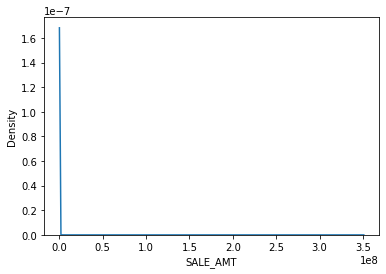

In [ ]:
sns.kdeplot(x=tr_dtl_list_0['SALE_AMT'])

# EDA

## 마트 분류

In [ ]:
gdsclss_0['STR_CD'].value_counts()

12018    607
0        165
Name: STR_CD, dtype: int64

## 장바구니 분류

In [ ]:
gdsclss_1

,CO_CD,STR_CD,GDS_CLSS_CD,GDS_CLSS_NM,GDS_CLSS_LVL_TP,UP_GDS_CLSS_CD,GDS_CLSS_GRP_TP
0,1001993,0,1,식 품 류,1,0,1
1,1001993,0,101,가공식품,2,1,1
2,1001993,0,10101,가공식품,3,101,1
3,1001993,0,10199,기타-가공식품,3,101,1
4,1001993,0,102,식 용 유,2,1,1
...,...,...,...,...,...,...,...
362,1002056,0,99,미등록,1,0,1
363,1002056,0,9979,임시핸디매입등록용,2,99,1
364,1002056,0,997979,임시핸디매입등록용,3,9979,1
365,1002056,0,9999,미등록,2,99,1


In [ ]:
gdsclss_1['GDS_CLSS_NM'].value_counts().head(100)

액세서리         5
위생용품         4
아이스크림        4
야    채       3
종량봉투         3
임의코드         3
쇼핑봉투         3
공    병       3
세 트 류        3
양    곡       3
정    육       3
수    산       3
청    과       3
베이커리         3
의약외품         3
미등록          3
담    배       3
기타분    유     2
기타주류         2
기타액세서리       2
유아용품         2
기타쇼핑봉투       2
방향방충         2
기타공    병     2
공 박 스        2
소주맥주         2
전통주류         2
기타건 어 물      2
양    주       2
건 어 물        2
기타양    곡     2
기타정    육     2
분유-과세        2
가공식품         2
기타수    산     2
기타청    과     2
기타담    배     2
기타야    채     2
기타임의코드       2
기타베이커리       2
분유-면세        2
기타면    세     2
식품면세         2
계    란       2
기타종량봉투       2
기타주    류     2
기타의약외품       2
패    드       2
카메라/필름       2
방향/방습/방충     2
문구/완구        2
의약품          2
애견용품         2
농산물          2
수산물          2
축산물          2
세제류          2
세정제          2
제지류          2
신문           2
도서/잡지        2
헤어용품         2
화장품          2
국산담배         2
양담배          2
POS등록용소분류    2
기초의류      

In [ ]:
gdsclss_0['GDS_CLSS_NM'].value_counts().head(100)

기타         16
식품         14
쓰레기봉투       7
야채          6
비식품         6
수산          6
계란          6
건어물         6
부자재         5
화장품         5
모기약         5
양곡          5
담배          5
수입류         5
샴푸린스        4
치약칫솔        4
염색약         4
세트          4
욕실용품        4
반찬          4
방향제         4
잡곡          4
식자재         4
청과          4
콩나물         4
주류          4
건전지         3
분유          3
화장품류        3
일회용품        3
생선          3
통일상사        3
기타잡화        3
유아용품        3
음료수류        3
미등록         3
스프류         3
포인트현금화      3
매입대분류       3
공병          3
수수료         3
과채류         3
면도기         3
정육          3
아울렛         3
아울렛기타잡화     3
소주          3
사내소비        3
신상품         3
팬시          3
문구류         3
한돈          2
닭           2
디핀다트코리아     2
돼지          2
수입소         2
수입돼지        2
제이제이코리아     2
육우          2
차마을         2
한우          2
미르상사        2
맘스케익        2
야채식자재       2
양념육         2
시집가는청국장     2
자동차용품       2
계육          2
맥주          2
막걸리         2
냉동          2
냉동식품  

- tr_list와 dtl_list가 장바구니 코드로 mapping되는 지 확인

In [ ]:
tr_list_0[
    (tr_list_0.SAL_DT == 20210901) &
    (tr_list_0.STR_CD == 12018) &
    (tr_list_0.POS_NO == "01") &
    (tr_list_0.TRAN_NO == 5)
]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SALE_KIND_TP_NM,SALE_RTN_SGN,REAL_SAL_DT,REAL_SAL_TTM,PAY_AMT,MSHP_ID,ORN_SAL_DT,ORN_POS_NO,ORN_TRAN_NO
4,20210901,12018,01,5,매출,1,20210901,91245,3650.0,012018_0,NaN,NaN,NaN


In [ ]:
tr_dtl_list_0[
    (tr_dtl_list_0.SAL_DT == 20210901) &
    (tr_dtl_list_0.STR_CD == 12018) &
    (tr_dtl_list_0.POS_NO == "01") &
    (tr_dtl_list_0.TRAN_NO == 5)
]

,SAL_DT,STR_CD,POS_NO,TRAN_NO,SEQ_NO,DESI_CNCL_TP_NM,SALE_RTN_SGN,PLU_CD,GDS_CLSS_CD,SALE_QTY,SALE_PRC,SALE_AMT,SGDS_DC_TP_NM,SGDS_DC_PRC,SUBTOT_DC_AMT,EVT_DC_AMT,CPON_DC_AMT,SCALES_GDS_TP_NM,GDS_CPON_DC_AMT,BASKET_CPON_DC_AMT
17,20210901,12018,01,5,1,정상판매,1,8801056190019,12202.0,1.0,2650.0,2650.0,정상,0.0,0.0,0.0,0.0,일반,0.0,0.0
18,20210901,12018,01,5,2,정상판매,1,8801056177355,12215.0,1.0,1000.0,1000.0,할인특매,0.0,0.0,0.0,0.0,일반,0.0,0.0


- tr_dtl이 거래 세부 내역이고 tr_listr가 장바구니 ID로 기준으로 한 해당 일시 총 거래 내역

In [ ]:
gds_0[gds_0['PLU_CD'] == 8801056190019]

,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
26014,1001294,12018,8801056190019,칠성사이다,12202,일반,20
85513,1001739,72005,8801056190019,칠성사이다 1.5pet,10203,일반,2


- 배추

In [ ]:
 gds_0[gds_0.GDS_NM.str.contains(r'(배추)')].head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,CO_CD,STR_CD,PLU_CD,GDS_NM,GDS_CLSS_CD,GDS_TP_NM,VEN_CD
765,1001294,12018,201162,양배추,30102,저울상품,80
772,1001294,12018,201169,알배기/쌈배추,30101,저울상품,80
773,1001294,12018,201170,통배추,39999,저울상품,80
774,1001294,12018,201171,배추,30899,저울상품,80
776,1001294,12018,201173,망배추,39999,저울상품,80
777,1001294,12018,201174,절임배추 1박스,30899,저울상품,80
2390,1001294,12018,22001054,양배추(반통),39999,일반,80
2414,1001294,12018,22001344,양배추,39999,일반,80
2419,1001294,12018,22001399,쌈배추,39999,일반,80
2430,1001294,12018,22001498,절임배추,39999,일반,80


In [ ]:
#konlpy.tag 설치 / 텍스트 마이닝
!sudo apt-get install python3-dev; pip3 install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 42.8 MB/s 


In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Mecab

In [ ]:
baechu = gds_0[gds_0.GDS_NM.str.contains(r'(배추)')]['GDS_NM'].tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [ ]:
text = ''.join(s for s in baechu)

In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

In [ ]:
print(nouns)

['양배추', '알', '배기', '쌈', '배추', '통', '배추', '배추', '망', '배추', '절임', '배추', '박스', '양배추', '통', '양배추', '쌈', '배추', '절임', '배추', '배추', '양배추', '통', '배추', '행사', '배추', '배추', '양배추', '쌈', '배추', '배추', '양배추', '입', '배추', '아이보리', '색끈', '망', '양배추', '망', '배추', '망쌈', '배추', '봉지', '통', '양배추', '망쌈', '배추', '벌', '통', '양배추', '수입', '박스', '배추', '특', '망', '배추', '박스', '배추', '통', '미니', '양배추', '팩', '양배추', '통', '양배추', '통', '인', '통', '한정', '배추', '행사', '망', '베이', '지끈', '절임', '배추', '박스', '꼬깔', '양배추', '통', '행사', '배추', '우거지', '양배추', '박스', '쌈', '배추', '알', '배기', '통', '정육', '양배추', '꼬마', '양배추', '통', '쌈', '배추', '특', '비닐', '포장', '봉', '쌈', '배추', '알', '배기', '통', '추가', '시일', '양배추', '칼', '일제', '양배추', '칼', '양배추', '칼', '양배추', '칼', '배추김치', '비비고', '배추김치', '배추김치', '비비고', '배추', '비비고', '배추', '비비고', '배추', '궁', '배추김치', '비비고', '포기', '배추', '비비', '고궁', '배추김치', '비비고', '포기', '배추김치', '비비고', '포기', '배추김치', '비비고', '포기', '배추김치', '비비고', '배추김치', '비비고', '배추김치', '비비고', '배추', '비비고', '배추김치', '비비고', '배추김치', '비비고', '배추', '비비고', '배추', '비비고', '배추', '비비고', '포기', '배

- merge 메소드로 합칠 필요 있음